## 火币，bitmex 价差分析

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../data/saved_price_diff_20181103.csv')

In [4]:
df.columns = df.columns.str.strip()
df['snapshotTime'] = df.snapshotTime.astype('datetime64[ns]')
df = df.set_index('snapshotTime')

df.head()

,huobiExchangeTime,bitmexExchangeTime,huobiPrice,bitmexPrice,diff
snapshotTime,,,,,
2018-10-31 13:32:32.714464,2018-10-31 13:32:32.545000,2018-10-31T13:32:32.600Z,6330.14,6267.5,62.64
2018-10-31 13:32:33.215035,2018-10-31 13:32:32.545000,2018-10-31T13:32:32.600Z,6330.14,6267.5,62.64
2018-10-31 13:32:33.715612,2018-10-31 13:32:32.545000,2018-10-31T13:32:32.600Z,6330.14,6267.5,62.64
2018-10-31 13:32:34.216174,2018-10-31 13:32:32.545000,2018-10-31T13:32:34.028Z,6330.14,6267.5,62.64
2018-10-31 13:32:34.716730,2018-10-31 13:32:32.545000,2018-10-31T13:32:34.028Z,6330.14,6267.5,62.64


In [15]:
# plot price_diff

def price_diff_plot(df):
    with plt.style.context('bmh'):
        fig, axs = plt.subplots(2,1, figsize=(16,9))
        
        df['diff'].plot(ax=axs[0], label='price diff', color='grey')
        axs[0].legend()

        df['huobiPrice'].plot(ax=axs[1], label='huobi')
        df['bitmexPrice'].plot(ax=axs[1], label='bitmex')
        axs[1].legend()

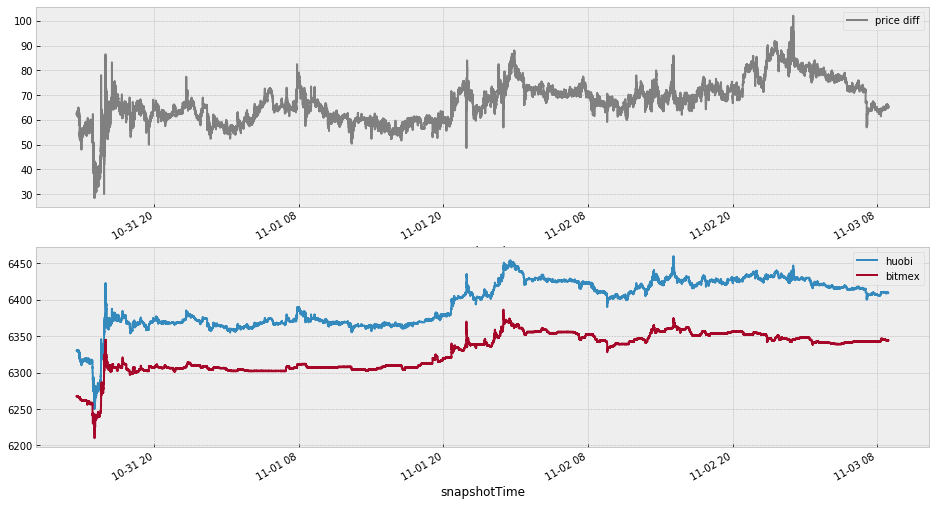

In [16]:
price_diff_plot(df)

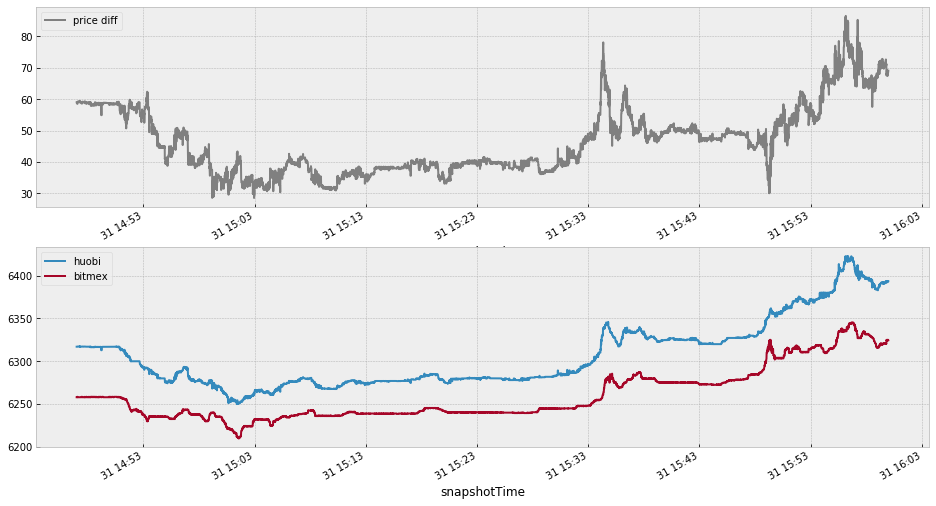

In [20]:
# sub time frame

sub_df = df[(np.datetime64('2018-10-31 14:47:00') < df.index.values) & 
            (df.index.values < np.datetime64('2018-10-31 15:59:59'))]
price_diff_plot(sub_df)

## TODO:

research:

- record bid, ask    
- use spread-trading price diff
    + spread_ask. Price of Long sparead (long huobi, short bitmex): huobi_ask - bitmex_bid 
    + spread_bid. Price of Short Sparead (short huobi, long bitmex): huobi_bid - bitmex_ask

tech:

- use db
